<a href="https://colab.research.google.com/github/tmarissa/marissa_DATA606/blob/main/ipynb/401_Box_Plot%2C_Matrix%2C_and_Bar_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 606 Capstone
## Marissa Tan
### Impact of COVID-19 on the US Housing Market
__Real Estate and Density Dataset__
- Correlation Matrix
- Split data to 2019 and 2021
- Percentage of Counties Average Listing Price Increased from 2018 to 2021
- Scatter Plot - Density vs Rural Percentage
- Cleansed Box Plot of outliers 2019 and 2021
- Analysis of Massachusetts data before and after removal of outliers 

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import cm
import missingno as msno
import numpy as np

%matplotlib inline

# 1. Merged Density and Real Estate CSV


## 1.1 Read the Real Estate and Density CSV
Acknowledgement Maede Maftouni of Kaggle. Link as follow https://www.kaggle.com/maedemaftouni/us-real-estate-market-trends-visualization

In [2]:
df = pd.read_csv('RE_Density.csv', index_col=False)
df.sample(5)

,FIPS,year,month,county,state,date,density,active_listing_count,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_per_square_foot,median_square_feet,total_listing_count,rural_%,rural_cat
132922,36005,2018,5,Bronx County,NY,2018-05-01,34979,1029.0,571648.0,0.0645,0.1604,399450.0,0.0869,0.2217,305.0,1200.0,1248.0,0.002816,2
117082,37167,2021,9,Stanly County,NC,2021-09-01,158,129.0,359594.0,-0.0261,-0.0679,259900.0,0.0313,0.0113,169.0,1697.0,242.0,67.713130,1
30873,13151,2018,10,Henry County,GA,2018-10-01,747,1692.0,287673.0,0.0352,0.1498,242095.0,-0.0119,0.1112,95.0,2553.0,2665.0,13.853336,2
89978,27043,2021,9,Faribault County,MN,2021-09-01,19,59.0,186216.0,0.1043,0.1528,162500.0,0.1653,0.4451,69.0,2209.0,81.0,77.619735,1
185315,48505,2021,11,Zapata County,TX,2021-11-01,13,15.0,158613.0,0.0468,0.0016,129000.0,0.0488,-0.1807,97.0,1280.0,15.0,23.534028,2


In [3]:
df.columns

Index(['FIPS', 'year', 'month', 'county', 'state', 'date', 'density',
       'active_listing_count', 'average_listing_price',
       'average_listing_price_mm', 'average_listing_price_yy',
       'median_listing_price', 'median_listing_price_mm',
       'median_listing_price_yy', 'median_listing_price_per_square_foot',
       'median_square_feet', 'total_listing_count', 'rural_%', 'rural_cat'],
      dtype='object')

## 1.2 Check Data Types

In [4]:
# This dataset will be used on some data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210005 entries, 0 to 210004
Data columns (total 19 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   FIPS                                  210005 non-null  int64  
 1   year                                  210005 non-null  int64  
 2   month                                 210005 non-null  int64  
 3   county                                210005 non-null  object 
 4   state                                 210005 non-null  object 
 5   date                                  210005 non-null  object 
 6   density                               210005 non-null  int64  
 7   active_listing_count                  210005 non-null  float64
 8   average_listing_price                 210005 non-null  float64
 9   average_listing_price_mm              172999 non-null  float64
 10  average_listing_price_yy              172224 non-null  float64
 11  

# 2. Data Exploration


## 2.1 Price Ratio Comparison 2019 and 2021
- pre-COVID (2019) and post-COVID (2020)
- Price ratio will be derived from the average list price and median list price

In [5]:
filters = [
    (df['average_listing_price_yy'] < 0) & (df['median_listing_price_yy'] < 0),
    (df['average_listing_price_mm'] < 0) & (df['median_listing_price_mm'] < 0),
]
values= ['Down from last year', 'Down from last month']

df['category'] = np.select(filters, values, default ='Increase in prices')
df.sample(4)

,FIPS,year,month,county,state,date,density,active_listing_count,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_per_square_foot,median_square_feet,total_listing_count,rural_%,rural_cat,category
50786,17109,2020,11,McDonough County,IL,2020-11-01,46,210.0,89696.0,-0.0405,-0.1480,69450.0,-0.0421,-0.1520,49.0,1486.0,249.0,29.504477,2,Down from last year
43862,16007,2020,8,Bear Lake County,ID,2020-08-01,6,31.0,540483.0,0.0123,0.2341,299900.0,-0.0584,-0.0044,164.0,2758.0,74.0,100.000000,1,Increase in prices
146235,40101,2020,1,Muskogee County,OK,2020-01-01,81,128.0,174297.0,0.0262,0.2317,141063.0,0.0666,0.2062,80.0,1701.0,195.0,41.117059,2,Increase in prices
94385,27173,2020,8,Yellow Medicine County,MN,2020-08-01,12,32.0,157146.0,-0.0038,0.2055,130000.0,-0.0845,0.1281,61.0,2156.0,47.0,80.820080,1,Down from last month


In [6]:
df['year'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [7]:
years = [2018, 2019, 2020, 2021]

In [8]:
def Housing_Ratio (year):
    for x in year:
        print('Price ratios for :', x)
        print(df.loc[df['year']== x, 'category'].value_counts()/
              len(df.loc[df['year']==x]*100))
        print('\n')
    return
        
Housing_Ratio(years)

Price ratios for : 2018
Increase in prices      0.561030
Down from last month    0.229724
Down from last year     0.209246
Name: category, dtype: float64


Price ratios for : 2019
Increase in prices      0.548410
Down from last year     0.231984
Down from last month    0.219606
Name: category, dtype: float64


Price ratios for : 2020
Increase in prices      0.607341
Down from last month    0.201254
Down from last year     0.191405
Name: category, dtype: float64


Price ratios for : 2021
Increase in prices      0.610669
Down from last month    0.224034
Down from last year     0.165296
Name: category, dtype: float64




In [9]:
# Make the nonetype to a list

eighteen = []
nineteen = []
twenty = []
twenty_one = []

for x in years:
    
    if x == 2018:    
        eighteen.append(df.loc[df['year']== x, 'category'].value_counts()/
          len(df.loc[df['year']==x]*100))
    elif x == 2019:
        nineteen.append(df.loc[df['year']== x, 'category'].value_counts()/
          len(df.loc[df['year']==x]*100))
    elif x == 2020:
        twenty.append(df.loc[df['year']== x, 'category'].value_counts()/
          len(df.loc[df['year']==x]*100))
    elif x == 2021:    
        twenty_one.append(df.loc[df['year']== x, 'category'].value_counts()/
          len(df.loc[df['year']==x]*100))
 

In [10]:
# Use numpy to split and make to a dataframe

year_str = [eighteen, nineteen, twenty, twenty_one]

split_items = []
for x in year_str:
    splitted = np.array_split(x, 1)
    
    for splitting in splitted:
        for i in splitting:
            split_items.append(i)
            
df_increase = pd.DataFrame(split_items, columns=["increase_in_price", "down_from_Last_year", "down_from_last_month"])
df_increase['year']= ['2018', '2019', '2020', '2021']
df_increase.set_index('year')

,increase_in_price,down_from_Last_year,down_from_last_month
year,,,
2018,0.561030,0.229724,0.209246
2019,0.548410,0.231984,0.219606
2020,0.607341,0.201254,0.191405
2021,0.610669,0.224034,0.165296


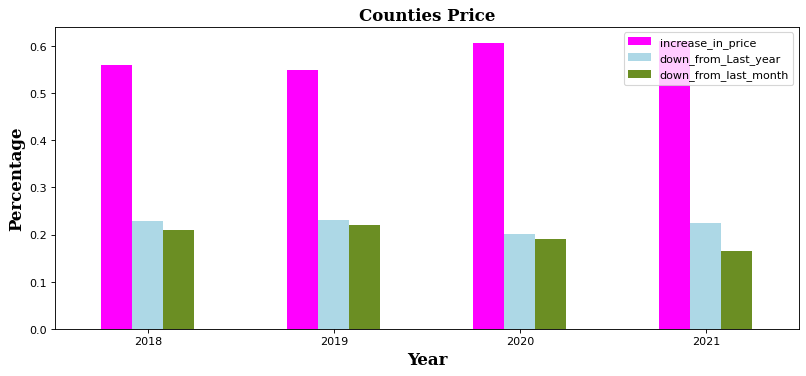

In [11]:
# Make a bar chart 

fig, ax = plt.subplots(1,1, figsize=(12,5), dpi=80)
ax = df_increase.plot.bar(ax=ax, color=['magenta','lightblue','olivedrab'])
ax.set_xticklabels(df_increase['year'])
ax.set_title('Counties Price', fontsize=15, fontweight='bold', fontfamily='serif')
ax.set_xlabel('Year', fontsize=15, fontweight='bold', fontfamily='serif')
ax.set_ylabel('Percentage', fontsize=15, fontweight='bold', fontfamily='serif')
plt.xticks(rotation = 360)
plt.show()

In [12]:
df.columns

Index(['FIPS', 'year', 'month', 'county', 'state', 'date', 'density',
       'active_listing_count', 'average_listing_price',
       'average_listing_price_mm', 'average_listing_price_yy',
       'median_listing_price', 'median_listing_price_mm',
       'median_listing_price_yy', 'median_listing_price_per_square_foot',
       'median_square_feet', 'total_listing_count', 'rural_%', 'rural_cat',
       'category'],
      dtype='object')

In 2018, 56.10% of houses in the county has an increase in price but is 23% down from last month and 21% down from last year.<br>
In 2019, 54.88% of houses in the county has an increase in price but is 23.17% down from last month and 21.94% down from last year.<br>
In 2020, 60.73% of the houses in the county has an increase in price but is 20.12% down from last month and 19.14% down from last year.<br>
In 2021, 61.06% of the houses in the county has an increase in price but is 22.40% down from last montn and 16.53% down from last year.

## 2.2 Correlation Matrix

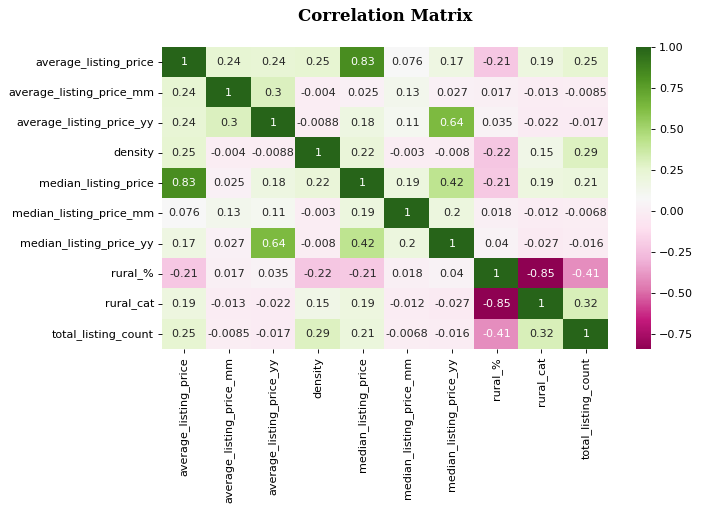

In [13]:
CorrMatrix = df[['average_listing_price', 'average_listing_price_mm', 
                 'average_listing_price_yy','density', 'median_listing_price', 'median_listing_price_mm', 
                 'median_listing_price_yy', 'rural_%','rural_cat','total_listing_count']].corr()
fig, ax = plt.subplots(1,1, figsize=(9,5), dpi=80)
sns.heatmap(CorrMatrix, annot=True, cmap='PiYG')
plt.title('Correlation Matrix\n', fontsize=15, fontweight='bold', fontfamily='serif')
plt.show()

The highest correlation is 83% which is between average listing price and median listing price. The next highest correction is average_listing_price_yy and median_listing_price_yy which is 68%.

## 2.3 Scatterplot


### 2.3a Density and Rural Percentage

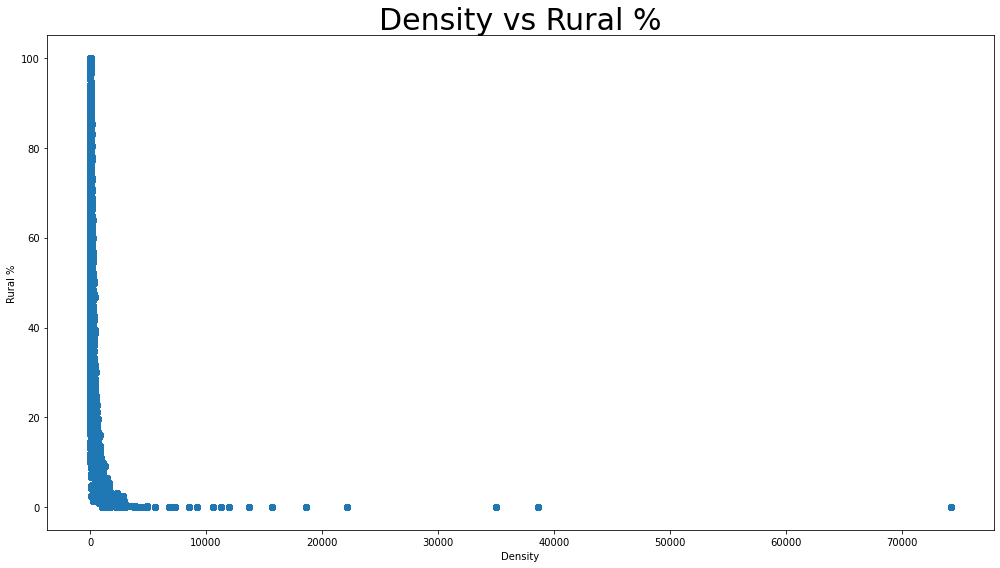

In [14]:
# Tell the figure ow the subplots should be laid out
# This is one row, and each row will have 2 plots
fig= plt.figure(figsize=(14,8))
axes1 = fig.add_subplot(1, 1, 1)

# add a plot to each of the axes created above
axes1.plot(df['density'], df['rural_%'], 'o')

# add a small title to each subplot
axes1.set_title('Density vs Rural %', fontsize=30)
axes1.set_xlabel('Density')
axes1.set_ylabel('Rural %')

# use a tight layout
fig.tight_layout()

The relationship between density and rural % is right skewed with right tail.


# 3. Data Split to 2019 and 2021

In [15]:
# The data will only be limited to 2019 and 2021
df = df[['FIPS', 'year', 'state','county','density', 'average_listing_price', 'average_listing_price_mm', 
                 'average_listing_price_yy', 'median_listing_price', 'median_listing_price_mm', 
                 'median_listing_price_yy', 'rural_%','rural_cat', 'total_listing_count']]

df_2019 = df.loc[df['year']==2019]
df_2021 = df.loc[df['year']==2021]

# 4. Boxplot (State)


## 4.1 Average Listing Price (Mean)

### 4.1a For the Year 2019

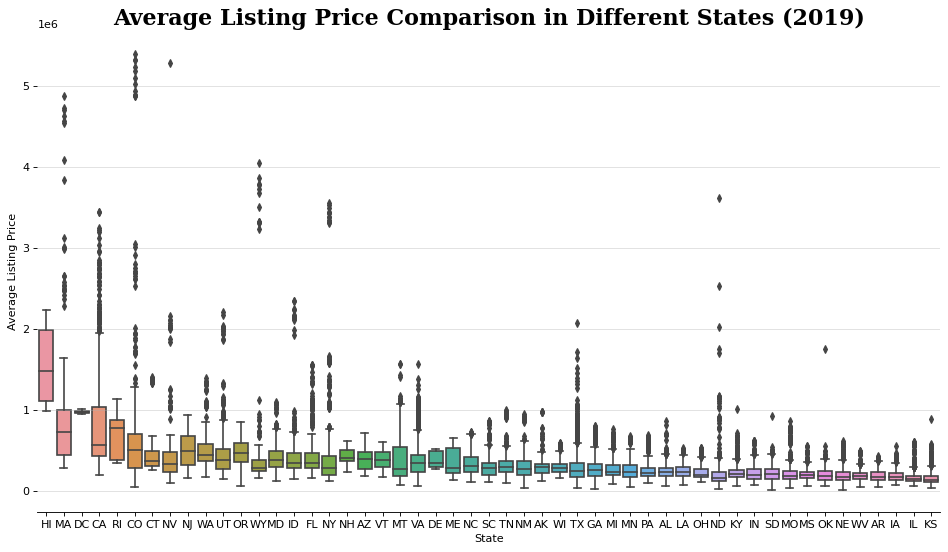

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12,7), dpi=80)

# by order of the state and get the average listing price
by_order = df_2019.groupby(by=['state'])['average_listing_price'].mean().sort_values(
    ascending=False).index

box_plot = sns.boxplot(x='state', y='average_listing_price', data=df_2019, order=by_order)
plt.ylabel("Average Listing Price")
plt.xlabel('State')
plt.title('Average Listing Price Comparison in Different States (2019)', fontsize=20, fontweight='bold', fontfamily='serif')
ax=box_plot.axes
lines = ax.get_lines()

for x in ['top', 'left', 'right']:
    ax.spines[x].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4)

box_plot.figure.tight_layout()

In [17]:
df_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
FIPS,37162.0,30325.901405,15144.751009,1001.0000,18171.000000,29153.000000,45063.000000,5.604500e+04
year,37162.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2.019000e+03
density,37162.0,277.911119,1864.994103,0.0000,17.000000,45.000000,119.000000,7.421100e+04
average_listing_price,37162.0,300860.324283,269961.451356,9900.0000,169932.500000,238419.500000,345998.000000,5.394137e+06
average_listing_price_mm,37112.0,0.010421,0.184557,-0.9391,-0.020200,0.002300,0.028100,1.411450e+01
average_listing_price_yy,37005.0,0.091333,0.606530,-0.9903,-0.037900,0.039200,0.130900,3.900000e+01
median_listing_price,37162.0,223552.932431,160397.254183,9900.0000,134900.000000,185000.000000,272500.000000,4.245000e+06
median_listing_price_mm,37112.0,0.011932,0.250859,-0.9562,-0.021100,0.000000,0.028700,2.460000e+01
median_listing_price_yy,37005.0,0.085717,0.555977,-0.9786,-0.032400,0.043200,0.132700,3.900000e+01
rural_%,37162.0,58.206802,31.324669,0.0000,32.971919,58.962876,85.593258,1.000000e+02


### 4.1b For the Year 2021

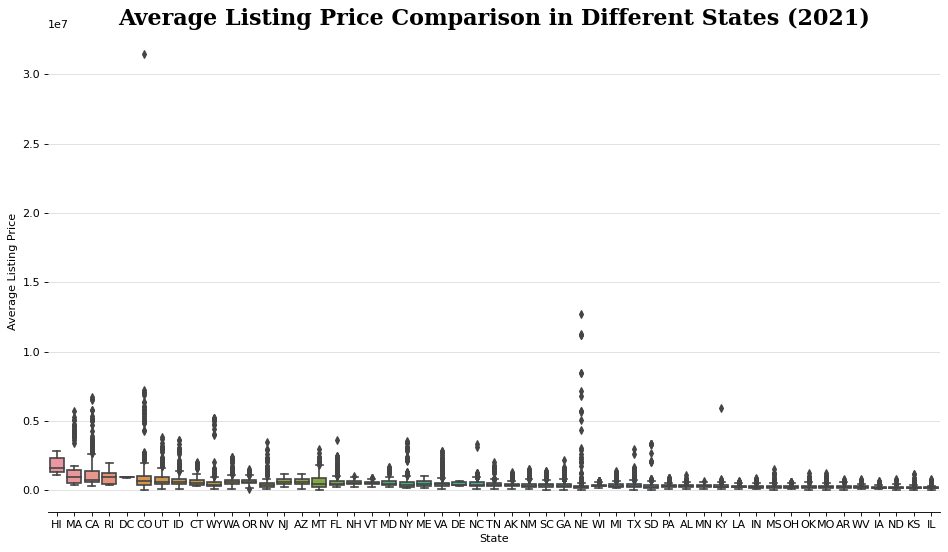

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12,7), dpi=80)

# by order of the state and get the average listing price
by_order = df_2021.groupby(by=['state'])['average_listing_price'].mean().sort_values(
    ascending=False).index

box_plot = sns.boxplot(x='state', y='average_listing_price', data=df_2021, order=by_order)
plt.ylabel("Average Listing Price")
plt.xlabel('State')
plt.title('Average Listing Price Comparison in Different States (2021)', fontsize=20, fontweight='bold', fontfamily='serif')
ax=box_plot.axes
lines = ax.get_lines()

#ax.ticks_params(axis='x', rotation=45)

for x in ['top', 'left', 'right']:
    ax.spines[x].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4)

box_plot.figure.tight_layout()

In [19]:
df_2021.describe().T

,count,mean,std,min,25%,50%,75%,max
FIPS,37097.0,30342.321805,15132.689437,1001.0000,18173.000000,29153.000000,45063.000000,5.604500e+04
year,37097.0,2021.000000,0.000000,2021.0000,2021.000000,2021.000000,2021.000000,2.021000e+03
density,37097.0,277.720004,1865.378019,0.0000,17.000000,45.000000,120.000000,7.421100e+04
average_listing_price,37097.0,392934.262285,438876.342664,15800.0000,201667.000000,300244.000000,450497.000000,3.150000e+07
average_listing_price_mm,37009.0,0.028121,0.779499,-0.9896,-0.036500,0.006500,0.056000,1.421821e+02
average_listing_price_yy,36928.0,0.243816,1.509387,-0.9869,-0.001725,0.135100,0.310600,1.323001e+02
median_listing_price,37097.0,278024.790226,305829.288576,2382.0000,156000.000000,230000.000000,335000.000000,1.680000e+07
median_listing_price_mm,37009.0,0.045695,1.842742,-0.9947,-0.036500,0.000000,0.055500,3.134416e+02
median_listing_price_yy,36928.0,0.211382,2.032935,-0.9947,-0.018700,0.105550,0.265225,1.758421e+02
rural_%,37097.0,58.162751,31.318943,0.0000,32.932758,58.945835,85.318135,1.000000e+02


## 4.2 Revised Box Plot
Outliers are removed and a new box plot is created<br><br>
References:<br>
https://androidkt.com/detect-and-remove-outliers-from-pandas-dataframe/<br>
https://stackoverflow.com/questions/47104072/remove-outliers-in-pandas-dataframe-with-groupby


### 4.2a For the Year 2019

In [20]:
# States with no outliers are separated and removed from list to be cleaned
states_no_outliers_2019 = df_2019[(df_2019['state'] == 'HI') | (df_2019['state'] == 'DC') | 
                             (df_2019['state'] == 'RI') | (df_2019['state'] == 'NJ') | 
                             (df_2019['state'] == 'AZ') | (df_2019['state'] == 'ME') |
                             (df_2019['state'] == 'DE')
                            ]
drop_states_2019 = df_2019[~(df_2019['state']).isin(states_no_outliers_2019['state'])]

In [21]:
# First round cleaning and remove outliers

df_cleaned_2019 = drop_states_2019[drop_states_2019.groupby('state')['average_listing_price'].\
        transform(lambda x : (x<x.quantile(0.86))& (x>(x.quantile(0.03)))).eq(1)]
df_clean_2019 = states_no_outliers_2019.append(df_cleaned_2019)
df_clean_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
FIPS,30934.0,30292.314088,15146.942624,1001.0000,18169.000000,29147.000000,45057.000000,56045.0
year,30934.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.0
density,30934.0,189.595526,950.229558,0.0000,16.000000,41.000000,101.000000,34979.0
average_listing_price,30934.0,256677.773776,149360.634205,46320.0000,165894.500000,221465.500000,302411.250000,2235543.0
average_listing_price_mm,30902.0,0.007678,0.127725,-0.9391,-0.021000,0.002200,0.028500,12.3
average_listing_price_yy,30829.0,0.076389,0.491744,-0.9903,-0.039100,0.039800,0.131900,39.0
median_listing_price,30934.0,199380.566076,102672.576909,21500.0000,131250.000000,174800.000000,242450.000000,1149000.0
median_listing_price_mm,30902.0,0.010710,0.197378,-0.9059,-0.022200,0.000000,0.029600,24.6
median_listing_price_yy,30829.0,0.086389,0.508135,-0.9751,-0.033000,0.045500,0.137000,39.0
rural_%,30934.0,59.707424,30.272016,0.0000,36.417634,60.512777,85.847475,100.0


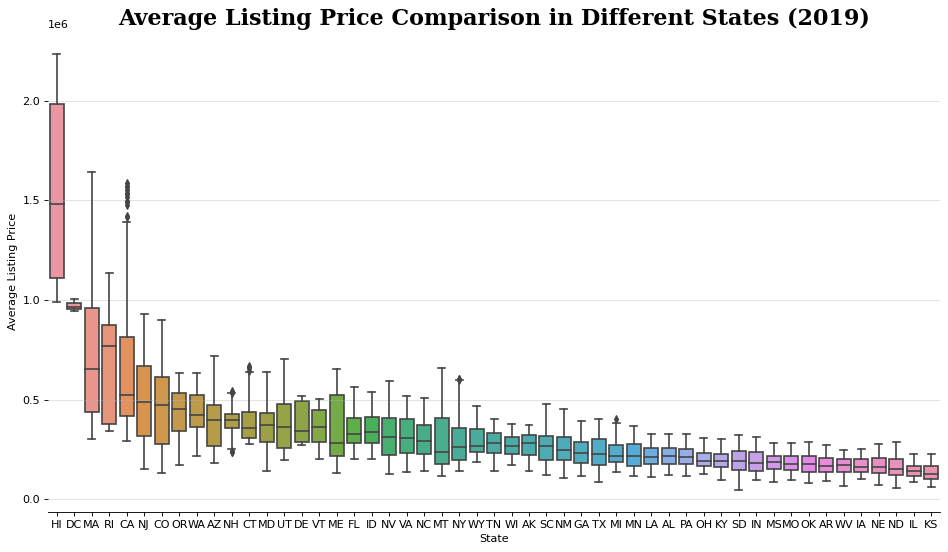

In [22]:
fig, ax = plt.subplots(1,1, figsize=(12,7), dpi=80)

# by order of the state and get the average listing price
by_order = df_clean_2019.groupby(by=['state'])['average_listing_price'].mean().sort_values(
    ascending=False).index

box_plot = sns.boxplot(x='state', y='average_listing_price', data=df_clean_2019, order=by_order)
plt.ylabel("Average Listing Price")
plt.xlabel('State')
plt.title('Average Listing Price Comparison in Different States (2019)', fontsize=20, fontweight='bold', fontfamily='serif')
ax=box_plot.axes
lines = ax.get_lines()

for x in ['top', 'left', 'right']:
    ax.spines[x].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4)

box_plot.figure.tight_layout()

In [23]:
# Second round cleaning to removed the dataframe that needs further cleaning NH, CA, MI, MD, and CT
# Removed the outliers. Made two group because can't take to much outlier it will change the 
# makeup of the states. For that reason, cleaning in three parts

CN_2019 = df_clean_2019[(df_clean_2019['state'] == 'CA') | (df_clean_2019['state'] == 'NY')]                       
CM_2019 = df_clean_2019[(df_clean_2019['state']=='MI') | (df_clean_2019['state'] == 'MD') | 
                        (df_clean_2019['state'] == 'CT') | (df_clean_2019['state'] == 'NH') ]
                        
CN_clean_2019 = CN_2019[CN_2019['average_listing_price'].\
        transform(lambda x : (x<x.quantile(0.85)) & (x>(x.quantile(0.05)))).eq(1)]
CM_clean_2019 = CM_2019[CM_2019['average_listing_price'].\
        transform(lambda x : (x<x.quantile(0.85)) & (x>(x.quantile(0.00)))).eq(1)]
CMN_2019=CN_2019.append(CM_2019)
CMN_clean_2019 = CN_clean_2019.append(CM_clean_2019)

In [24]:
# The dataframe cleaned 2019 and needs further cleaning drop the being cleaned
# Concat CDMN_clean_2019 and CDMN_drop.

CMN_drop_2019 = df_clean_2019[~(df_clean_2019['state']).isin(CMN_2019['state'])]
df_all_2019 = CMN_drop_2019.append(CMN_clean_2019)
df_all_2019.describe()

,FIPS,year,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
count,30507.000000,30507.0,30507.000000,3.050700e+04,30475.000000,30402.000000,3.050700e+04,30475.000000,30402.000000,30507.000000,30507.000000,30507.000000
mean,30460.022585,2019.0,185.483364,2.509845e+05,0.007495,0.076221,1.959187e+05,0.010767,0.087112,60.047718,1.379126,393.214377
std,15115.862425,0.0,952.428290,1.355666e+05,0.127627,0.494169,9.545046e+04,0.198717,0.511591,30.177180,0.485178,992.919636
min,1001.000000,2019.0,0.000000,4.632000e+04,-0.939100,-0.990300,2.150000e+04,-0.905900,-0.975100,0.000000,1.000000,0.000000
25%,19003.000000,2019.0,16.000000,1.654610e+05,-0.021200,-0.039500,1.304290e+05,-0.022400,-0.033600,36.822160,1.000000,44.000000
50%,29167.000000,2019.0,40.000000,2.202060e+05,0.002200,0.039900,1.734000e+05,0.000000,0.045900,60.720947,1.000000,122.000000
75%,45079.000000,2019.0,99.000000,2.990315e+05,0.028600,0.132300,2.399000e+05,0.029950,0.138500,86.744724,2.000000,328.000000
max,56045.000000,2019.0,34979.000000,2.235543e+06,12.300000,39.000000,1.149000e+06,24.600000,39.000000,100.000000,2.000000,26147.000000


In [25]:
len(df_all_2019['state'].unique())

51

### 4.2aa Cleansed Twice 2019 Box Plot

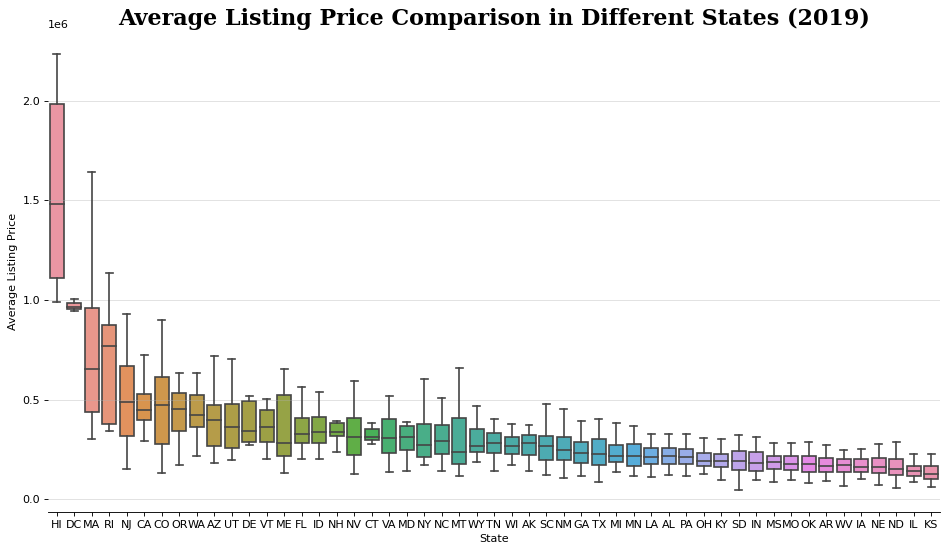

In [26]:
fig, ax = plt.subplots(1,1, figsize=(12,7), dpi=80)

# by order of the state and get the average listing price
by_order = df_all_2019.groupby(by=['state'])['average_listing_price'].mean().sort_values(
    ascending=False).index

box_plot = sns.boxplot(x='state', y='average_listing_price', data=df_all_2019, order=by_order)
plt.ylabel("Average Listing Price")
plt.xlabel('State')
plt.title('Average Listing Price Comparison in Different States (2019)', fontsize=20, fontweight='bold', fontfamily='serif')
ax=box_plot.axes
lines = ax.get_lines()

for x in ['top', 'left', 'right']:
    ax.spines[x].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4)

box_plot.figure.tight_layout()

### 4.2b For the Year 2021

In [27]:
# States with no outliers are separated and removed from list to be cleaned
states_no_outliers_2021 = df_2021[(df_2021['state'] == 'HI') | (df_2021['state'] == 'DC') | 
                             (df_2021['state'] == 'RI') | (df_2021['state'] == 'NJ') | 
                             (df_2021['state'] == 'AZ') | (df_2021['state'] == 'ME') |
                             (df_2021['state'] == 'DE')
                            ]
drop_states_2021 = df_2021[~(df_2021['state']).isin(states_no_outliers_2021['state'])]

In [28]:
# First round cleaning and remove outliers

df_cleaned_2021 = drop_states_2021[drop_states_2021.groupby('state')['average_listing_price'].\
        transform(lambda x : (x<x.quantile(0.86))& (x>(x.quantile(0.00)))).eq(1)]
df_clean_2021 = states_no_outliers_2021.append(df_cleaned_2021)
df_clean_2021.describe().T

,count,mean,std,min,25%,50%,75%,max
FIPS,31943.0,30318.738910,15133.367071,1001.0000,18171.00000,29149.000000,45060.000000,5.604500e+04
year,31943.0,2021.000000,0.000000,2021.0000,2021.00000,2021.000000,2021.000000,2.021000e+03
density,31943.0,203.966002,1046.476019,0.0000,16.00000,41.000000,105.000000,3.497900e+04
average_listing_price,31943.0,319276.311837,205519.780350,15900.0000,189576.00000,272110.000000,385313.000000,2.850052e+06
average_listing_price_mm,31865.0,0.017096,0.178087,-0.9896,-0.03940,0.005000,0.054900,1.065310e+01
average_listing_price_yy,31799.0,0.169305,0.399904,-0.9869,-0.01345,0.120700,0.284300,1.092040e+01
median_listing_price,31943.0,240712.617068,136246.765287,2382.0000,149500.00000,209900.000000,297000.000000,1.625000e+06
median_listing_price_mm,31865.0,0.035546,1.771378,-0.9947,-0.03950,0.000000,0.055800,3.134416e+02
median_listing_price_yy,31799.0,0.165221,0.453005,-0.9947,-0.02700,0.099000,0.255200,1.242860e+01
rural_%,31943.0,59.305658,30.590990,0.0000,35.18476,60.063877,86.252724,1.000000e+02


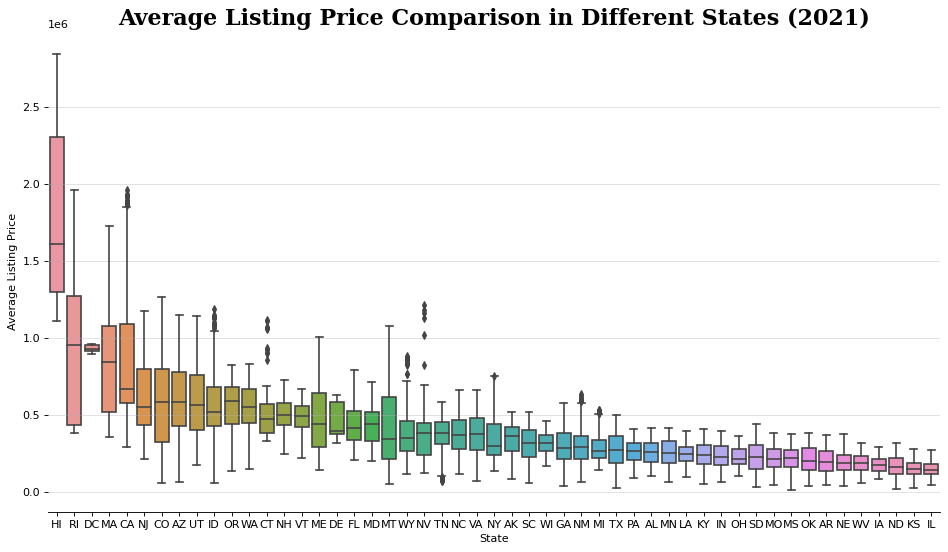

In [29]:
fig, ax = plt.subplots(1,1, figsize=(12,7), dpi=80)

# by order of the state and get the average listing price
by_order = df_clean_2021.groupby(by=['state'])['average_listing_price'].mean().sort_values(
    ascending=False).index

box_plot = sns.boxplot(x='state', y='average_listing_price', data=df_clean_2021, order=by_order)
plt.ylabel("Average Listing Price")
plt.xlabel('State')
plt.title('Average Listing Price Comparison in Different States (2021)', fontsize=20, fontweight='bold', fontfamily='serif')
ax=box_plot.axes
lines = ax.get_lines()

#ax.ticks_params(axis='x', rotation=45)

for x in ['top', 'left', 'right']:
    ax.spines[x].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4)

box_plot.figure.tight_layout()

In [30]:
# Second round cleaning to removed the dataframe that needs further cleaning ID, CA, DE, CT, TN, NY,
# NY, NM, WY, and MI. Removed the outliers. Made two group because can't take to much outlier it will change the 
# makeup of the states. For that reason, cleaning in three parts.

CI_2021 = df_clean_2021[(df_clean_2021['state'] == 'ID') | (df_clean_2021['state'] == 'CA') |
                         (df_clean_2021['state']=='CT')]
TNMY_2021 = df_clean_2021[(df_clean_2021['state'] == 'TN') | (df_clean_2021['state'] == 'NY') | 
                         (df_clean_2021['state']=='NV') | (df_clean_2021['state'] == 'NM') |
                         (df_clean_2021['state']=='WY') | (df_clean_2021['state'] == 'MI') ]
                          
CI_clean_2021 = CI_2021[CI_2021['average_listing_price'].\
        transform(lambda x : (x<x.quantile(0.75)) & (x>(x.quantile(0.15)))).eq(1)]
TNMY_clean_2021 = TNMY_2021[TNMY_2021['average_listing_price'].\
        transform(lambda x : (x<x.quantile(0.80)) & (x>(x.quantile(0.10)))).eq(1)]
CITNMY_2021=TNMY_2021.append(CI_2021)
CITNMY_clean_2021 = TNMY_clean_2021.append(CI_clean_2021)

In [31]:
CI_2021.describe()

,FIPS,year,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
count,1128.000000,1128.0,1128.000000,1.128000e+03,1126.000000,1126.000000,1.128000e+03,1126.000000,1126.000000,1128.000000,1128.000000,1128.000000
mean,10253.377660,2021.0,236.597518,7.136002e+05,0.018650,0.303109,4.926149e+05,0.021654,0.255231,42.892229,1.633865,733.195922
std,4777.730134,0.0,876.110874,3.490627e+05,0.142074,0.498482,2.046886e+05,0.158575,0.531052,31.360169,0.481961,1355.089537
min,6001.000000,2021.0,0.000000,6.000000e+04,-0.586400,-0.828500,6.000000e+04,-0.663100,-0.828500,0.000000,1.000000,1.000000
25%,6051.000000,2021.0,7.000000,4.833780e+05,-0.029525,0.089275,3.549375e+05,-0.021275,0.078600,14.797809,1.000000,51.000000
50%,6111.000000,2021.0,43.000000,6.185660e+05,0.007950,0.214050,4.394500e+05,0.005250,0.160900,40.871915,2.000000,191.000000
75%,16033.000000,2021.0,169.000000,8.138682e+05,0.046800,0.399750,5.628750e+05,0.042050,0.299150,65.826281,2.000000,775.500000
max,16087.000000,2021.0,18646.000000,1.966643e+06,2.229800,7.541400,1.345000e+06,1.958700,8.583300,100.000000,2.000000,8190.000000


In [32]:
CI_clean_2021.describe()

,FIPS,year,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
count,676.000000,676.0,676.000000,676.000000,676.000000,674.000000,676.000000,676.000000,674.000000,676.000000,676.000000,676.000000
mean,10633.778107,2021.0,148.047337,593115.150888,0.020802,0.323519,434156.710059,0.026604,0.258284,42.862912,1.621302,614.739645
std,4866.257925,0.0,291.368288,98904.693956,0.122731,0.483551,89630.160473,0.166628,0.463976,29.739599,0.485422,1209.151900
min,6003.000000,2021.0,0.000000,412265.000000,-0.564900,-0.355200,71000.000000,-0.663100,-0.802800,2.062112,1.000000,6.000000
25%,6066.500000,2021.0,7.000000,511593.250000,-0.025000,0.110350,379000.000000,-0.019800,0.102575,15.729306,1.000000,52.000000
50%,6115.000000,2021.0,44.000000,590203.500000,0.009650,0.233000,430000.000000,0.006500,0.177250,34.332206,2.000000,182.000000
75%,16045.000000,2021.0,129.000000,659658.750000,0.049350,0.423600,483081.250000,0.044950,0.307225,65.826281,2.000000,592.000000
max,16087.000000,2021.0,1643.000000,813603.000000,1.216800,7.541400,911000.000000,1.958700,8.583300,100.000000,2.000000,7845.000000


In [33]:
# The dataframe cleaned 2021 and needs further cleaning drop the being cleaned
# Concat CDMN_clean_2021 and CDMN_drop_2021.

CITNMY_drop_2021 = df_clean_2021[~(df_clean_2021['state']).isin(CITNMY_2021['state'])]
df_all_2021 = CITNMY_drop_2021.append(CITNMY_clean_2021)
df_all_2021.describe()

,FIPS,year,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
count,30528.000000,30528.0,30528.000000,3.052800e+04,30453.000000,30384.000000,3.052800e+04,30453.000000,30384.000000,30528.000000,30528.000000,30528.000000
mean,30351.350301,2021.0,180.900976,3.075573e+05,0.017169,0.166224,2.338997e+05,0.036315,0.163386,59.618691,1.384041,274.228806
std,15101.151588,0.0,667.790422,1.848283e+05,0.179640,0.400101,1.257422e+05,1.811652,0.453935,30.469645,0.486376,714.941248
min,1001.000000,2021.0,0.000000,1.590000e+04,-0.989600,-0.986900,2.382000e+03,-0.994700,-0.994700,0.000000,1.000000,0.000000
25%,19007.000000,2021.0,16.000000,1.884002e+05,-0.039700,-0.015200,1.489000e+05,-0.039700,-0.029900,35.527833,1.000000,26.000000
50%,29137.000000,2021.0,41.000000,2.683070e+05,0.005000,0.117600,2.049000e+05,0.000000,0.096900,60.357170,1.000000,74.000000
75%,45053.000000,2021.0,102.000000,3.743728e+05,0.055000,0.279600,2.890000e+05,0.056300,0.254200,86.849780,2.000000,210.000000
max,56045.000000,2021.0,15692.000000,2.850052e+06,10.653100,10.920400,1.625000e+06,313.441600,12.428600,100.000000,2.000000,15861.000000


### 4.2bb Cleansed Twice 2021 Box Plot

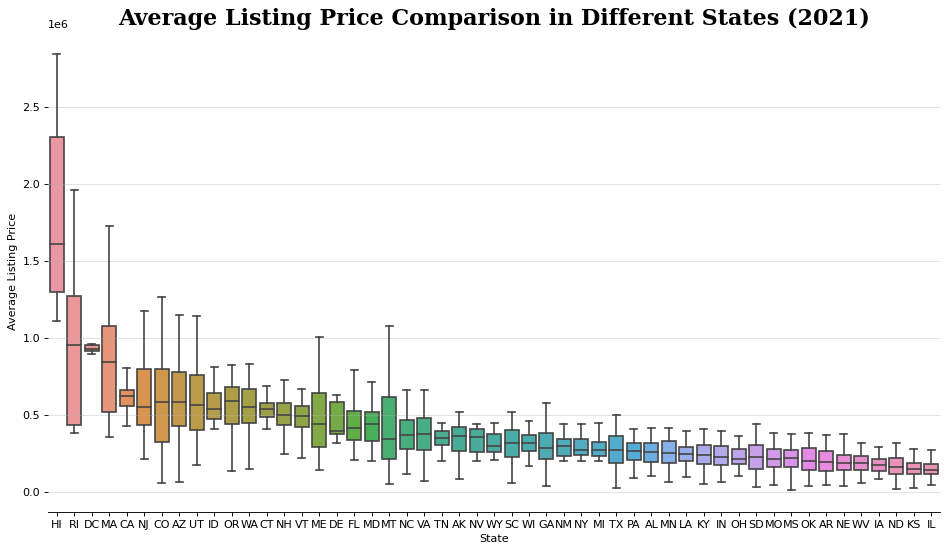

In [34]:
fig, ax = plt.subplots(1,1, figsize=(12,7), dpi=80)

# by order of the state and get the average listing price
by_order = df_all_2021.groupby(by=['state'])['average_listing_price'].mean().sort_values(
    ascending=False).index

box_plot = sns.boxplot(x='state', y='average_listing_price', data=df_all_2021, order=by_order)
plt.ylabel("Average Listing Price")
plt.xlabel('State')
plt.title('Average Listing Price Comparison in Different States (2021)', fontsize=20, fontweight='bold', fontfamily='serif')
ax=box_plot.axes
lines = ax.get_lines()

for x in ['top', 'left', 'right']:
    ax.spines[x].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4)

box_plot.figure.tight_layout()

# 5. Analyzing Effects of Removing Outlier


## 5.1 Massachusettes

### 5.1a For the Year 2019

In [35]:
# This is data before removing outliers
df_MA_2019 = df_2019[df_2019['state']=='MA']
df_MA_2019.describe()

,FIPS,year,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
count,168.00000,168.0,168.000000,1.680000e+02,168.000000,168.000000,1.680000e+02,168.000000,168.000000,168.000000,168.000000,168.000000
mean,25014.00000,2019.0,1715.142857,1.066211e+06,0.008580,0.051451,7.520217e+05,0.008735,0.059610,16.754502,1.928571,1563.773810
std,8.08636,0.0,3394.818500,1.007891e+06,0.038735,0.101206,7.719931e+05,0.038596,0.120788,15.546486,0.258309,1196.311315
min,25001.00000,2019.0,101.000000,2.749190e+05,-0.115900,-0.309300,2.294500e+05,-0.116600,-0.183600,0.074091,1.000000,42.000000
25%,25007.00000,2019.0,307.000000,4.364310e+05,-0.011650,0.006850,3.724375e+05,-0.012625,-0.000550,4.244045,2.000000,490.500000
50%,25014.00000,2019.0,667.500000,7.236040e+05,0.001250,0.053600,5.284500e+05,0.002550,0.049000,10.071024,2.000000,1407.000000
75%,25021.00000,2019.0,1644.000000,9.983080e+05,0.022675,0.084075,6.696000e+05,0.026575,0.083475,27.443699,2.000000,2095.750000
max,25027.00000,2019.0,13722.000000,4.867436e+06,0.229700,0.535600,4.245000e+06,0.241800,0.810200,54.431710,2.000000,5540.000000


In [36]:
df_MA_2019['county'].unique()

array(['Barnstable County', 'Berkshire County', 'Bristol County',
       'Dukes County', 'Essex County', 'Franklin County',
       'Hampden County', 'Hampshire County', 'Middlesex County',
       'Nantucket County', 'Norfolk County', 'Plymouth County',
       'Suffolk County', 'Worcester County'], dtype=object)

In [37]:
df_MA_2019[(df_MA_2019['county'] == 'Dukes County')].describe()

,FIPS,year,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
count,12.0,12.0,12.0,1.200000e+01,12.000000,12.000000,1.200000e+01,12.000000,12.000000,1.200000e+01,12.0,12.000000
mean,25007.0,2019.0,199.0,2.493654e+06,0.004500,0.092775,1.572321e+06,0.005808,0.104133,3.902631e+01,2.0,259.500000
std,0.0,0.0,0.0,1.087849e+05,0.045485,0.084276,1.085795e+05,0.050715,0.046935,7.421377e-15,0.0,53.471318
min,25007.0,2019.0,199.0,2.279527e+06,-0.054700,-0.024000,1.395000e+06,-0.097100,0.001700,3.902631e+01,2.0,179.000000
25%,25007.0,2019.0,199.0,2.447703e+06,-0.022175,0.040900,1.496875e+06,-0.030825,0.076925,3.902631e+01,2.0,209.000000
50%,25007.0,2019.0,199.0,2.488436e+06,-0.006250,0.071850,1.567500e+06,0.026300,0.114650,3.902631e+01,2.0,273.500000
75%,25007.0,2019.0,199.0,2.550141e+06,0.021675,0.138950,1.635000e+06,0.034225,0.133425,3.902631e+01,2.0,296.500000
max,25007.0,2019.0,199.0,2.655572e+06,0.121200,0.229100,1.755000e+06,0.078500,0.170400,3.902631e+01,2.0,329.000000


In [38]:
df_MA_2019[(df_MA_2019['county'] == 'Nantucket County')].describe()

,FIPS,year,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
count,12.0,12.0,12.0,1.200000e+01,12.000000,12.000000,1.200000e+01,12.000000,12.000000,1.200000e+01,12.0,12.000000
mean,25019.0,2019.0,316.0,4.002041e+06,0.027742,0.111275,3.182619e+06,0.041767,0.324292,1.889501e+01,2.0,56.333333
std,0.0,0.0,0.0,7.727104e+05,0.102536,0.293348,7.419043e+05,0.091995,0.301896,3.710688e-15,0.0,7.177406
min,25019.0,2019.0,316.0,2.986450e+06,-0.115900,-0.309300,2.295000e+06,-0.116600,-0.120700,1.889501e+01,2.0,42.000000
25%,25019.0,2019.0,316.0,3.091180e+06,-0.033275,-0.194950,2.295000e+06,0.000000,0.004950,1.889501e+01,2.0,53.500000
50%,25019.0,2019.0,316.0,4.310790e+06,0.006600,0.199300,3.405000e+06,0.023850,0.369250,1.889501e+01,2.0,58.500000
75%,25019.0,2019.0,316.0,4.637696e+06,0.035150,0.314000,3.754107e+06,0.076500,0.565950,1.889501e+01,2.0,61.250000
max,25019.0,2019.0,316.0,4.867436e+06,0.229700,0.535600,4.245000e+06,0.241800,0.810200,1.889501e+01,2.0,64.000000


In [39]:
df_MA_2019_cleansed = df_all_2019[df_all_2019['state']=='MA']
df_MA_2019_cleansed.describe()

,FIPS,year,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
count,138.000000,138.0,138.000000,1.380000e+02,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,25014.217391,2019.0,2010.434783,7.206696e+05,0.007747,0.044345,491653.978261,0.006791,0.034389,14.987504,1.913043,1830.304348
std,8.551893,0.0,3680.674416,3.303218e+05,0.027626,0.066341,158419.436983,0.028213,0.057022,15.642605,0.282798,1145.886821
min,25001.000000,2019.0,101.000000,3.009430e+05,-0.048000,-0.168900,239900.000000,-0.059400,-0.183600,0.074091,1.000000,202.000000
25%,25005.000000,2019.0,307.000000,4.350705e+05,-0.009475,0.011425,372062.500000,-0.011975,-0.004025,3.027706,2.000000,1164.750000
50%,25015.000000,2019.0,805.000000,6.526005e+05,0.001750,0.054200,499925.000000,0.003650,0.038800,9.834302,2.000000,1628.500000
75%,25023.000000,2019.0,1832.000000,9.611900e+05,0.022250,0.074800,599787.500000,0.019000,0.079275,27.443699,2.000000,2249.250000
max,25027.000000,2019.0,13722.000000,1.639156e+06,0.118600,0.234900,824000.000000,0.102000,0.180500,54.431710,2.000000,5540.000000


In [40]:
df_MA_2019_cleansed['county'].unique()

array(['Barnstable County', 'Berkshire County', 'Bristol County',
       'Essex County', 'Franklin County', 'Hampden County',
       'Hampshire County', 'Middlesex County', 'Norfolk County',
       'Plymouth County', 'Suffolk County', 'Worcester County'],
      dtype=object)

### 5.1b For the Year 2021

In [41]:
# This is data before removing outliers
df_MA_2021 = df_2021[df_2021['state']=='MA']
df_MA_2021.describe()

,FIPS,year,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
count,168.00000,168.0,168.000000,1.680000e+02,168.000000,168.000000,1.680000e+02,168.000000,168.000000,168.000000,168.000000,168.000000
mean,25014.00000,2021.0,1715.142857,1.361563e+06,0.007214,0.156387,9.042388e+05,0.007067,0.094123,16.754502,1.928571,802.750000
std,8.08636,0.0,3394.818500,1.284858e+06,0.048000,0.189186,9.153477e+05,0.048553,0.151082,15.546486,0.258309,596.112041
min,25001.00000,2021.0,101.000000,3.483970e+05,-0.193600,-0.173100,2.590000e+05,-0.148400,-0.157100,0.074091,1.000000,60.000000
25%,25007.00000,2021.0,307.000000,5.314900e+05,-0.025575,0.031075,4.378500e+05,-0.021300,0.000625,4.244045,2.000000,259.000000
50%,25014.00000,2021.0,667.500000,9.555610e+05,0.005350,0.104050,5.774750e+05,0.005250,0.049300,10.071024,2.000000,681.000000
75%,25021.00000,2021.0,1644.000000,1.463127e+06,0.039400,0.229500,7.461750e+05,0.029300,0.129400,27.443699,2.000000,1059.000000
max,25027.00000,2021.0,13722.000000,5.688385e+06,0.132600,0.765600,4.122500e+06,0.206900,0.750000,54.431710,2.000000,2260.000000


In [42]:
df_MA_2021['county'].unique()

array(['Barnstable County', 'Berkshire County', 'Bristol County',
       'Dukes County', 'Essex County', 'Franklin County',
       'Hampden County', 'Hampshire County', 'Middlesex County',
       'Nantucket County', 'Norfolk County', 'Plymouth County',
       'Suffolk County', 'Worcester County'], dtype=object)

In [43]:
df_MA_2021[(df_MA_2021['county'] == 'Dukes County')].describe()

,FIPS,year,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
count,12.0,12.0,12.0,1.200000e+01,12.000000,12.000000,1.200000e+01,12.000000,12.000000,1.200000e+01,12.0,12.000000
mean,25007.0,2021.0,199.0,3.953890e+06,0.016000,0.443042,2.474548e+06,0.015425,0.472308,3.902631e+01,2.0,240.583333
std,0.0,0.0,0.0,2.645873e+05,0.073377,0.215111,2.366878e+05,0.088254,0.150984,7.421377e-15,0.0,29.509500
min,25007.0,2021.0,199.0,3.425019e+06,-0.106200,0.175000,2.175000e+06,-0.098300,0.154700,3.902631e+01,2.0,195.000000
25%,25007.0,2021.0,199.0,3.858822e+06,-0.027125,0.237550,2.259250e+06,-0.041075,0.384925,3.902631e+01,2.0,222.000000
50%,25007.0,2021.0,199.0,3.976223e+06,0.034400,0.470900,2.482500e+06,-0.010050,0.484300,3.902631e+01,2.0,229.500000
75%,25007.0,2021.0,199.0,4.113078e+06,0.045500,0.592225,2.631250e+06,0.050225,0.537250,3.902631e+01,2.0,264.750000
max,25007.0,2021.0,199.0,4.404560e+06,0.132600,0.765600,2.850079e+06,0.206900,0.750000,3.902631e+01,2.0,296.000000


In [44]:
df_MA_2021[(df_MA_2021['county'] == 'Nantucket County')].describe()

,FIPS,year,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
count,12.0,12.0,12.0,1.200000e+01,12.000000,12.000000,1.200000e+01,12.000000,12.000000,1.200000e+01,12.0,12.000000
mean,25019.0,2021.0,316.0,4.718867e+06,0.025583,0.336933,3.595000e+06,0.020075,0.194842,1.889501e+01,2.0,141.333333
std,0.0,0.0,0.0,4.816294e+05,0.050662,0.166351,2.415810e+05,0.065949,0.130114,3.710688e-15,0.0,27.150534
min,25019.0,2021.0,316.0,4.018116e+06,-0.057600,0.201400,3.250000e+06,-0.092200,-0.013700,1.889501e+01,2.0,89.000000
25%,25019.0,2021.0,316.0,4.325523e+06,-0.007025,0.216000,3.439375e+06,-0.027675,0.127675,1.889501e+01,2.0,129.500000
50%,25019.0,2021.0,316.0,4.645011e+06,0.032050,0.267700,3.621250e+06,0.026750,0.154100,1.889501e+01,2.0,139.500000
75%,25019.0,2021.0,316.0,5.043484e+06,0.064050,0.393350,3.706250e+06,0.061925,0.246775,1.889501e+01,2.0,162.000000
max,25019.0,2021.0,316.0,5.688385e+06,0.097900,0.633700,4.122500e+06,0.115700,0.435500,1.889501e+01,2.0,182.000000


In [45]:
df_MA_2021_cleansed = df_all_2021[df_all_2021['state']=='MA']
df_MA_2021_cleansed.describe()

,FIPS,year,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
count,143.000000,143.0,143.000000,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,25014.174825,2021.0,1966.503497,8.693782e+05,0.004801,0.117106,551178.545455,0.005388,0.054117,14.763145,1.916084,907.685315
std,8.402980,0.0,3622.704273,3.827657e+05,0.045280,0.158465,166791.227834,0.042512,0.095952,15.410201,0.278236,585.053560
min,25001.000000,2021.0,101.000000,3.568930e+05,-0.193600,-0.173100,271900.000000,-0.148400,-0.157100,0.074091,1.000000,60.000000
25%,25007.000000,2021.0,438.500000,5.237795e+05,-0.027700,0.008100,425000.000000,-0.018100,-0.001200,3.635876,2.000000,536.000000
50%,25015.000000,2021.0,805.000000,8.497240e+05,0.003100,0.083800,549500.000000,0.005400,0.033300,9.834302,2.000000,772.000000
75%,25022.000000,2021.0,1738.000000,1.083700e+06,0.035150,0.168050,705999.000000,0.026550,0.099050,22.916993,2.000000,1223.500000
max,25027.000000,2021.0,13722.000000,1.729213e+06,0.126200,0.644400,867000.000000,0.124700,0.398100,54.431710,2.000000,2260.000000


In [46]:
df_MA_2021_cleansed['county'].unique()

array(['Barnstable County', 'Berkshire County', 'Bristol County',
       'Essex County', 'Franklin County', 'Hampden County',
       'Hampshire County', 'Middlesex County', 'Norfolk County',
       'Plymouth County', 'Suffolk County', 'Worcester County'],
      dtype=object)

Massachusetts has 14 counties. Dukes and Nantucket are very expensive counties. The average listing price of their houses could be around 2MM to 6MM. As a result, these counties became outliers since it does not belong to the 75% quantile, so it will not be include in the choropleth map. There will only be 12 counties. 

### Analyzing the Box Plot
There are many outliers before cleansing the dataset. The dataset was cleaned multiple steps to keep the integrity of the dataset. First, the states with no outliers were separated. The remaining states were partitioned to be cleansed in steps by separating those states that had their outliers removed. Still outliers remained and was cleansed again.<br>
The result was outliers in very expensive were removed.  In the case of Massachusetts which has 14 counties. Twelve counties remained after cleaning. The very expensive counties in Massachusetts were Duke and Nantucket in cleansed off.

# 6. Save To CSV
This will save the to csv:<br>
- cleansed data 
  - df_2019.csv and df_2021.csv

- uncleansed data
  - df_outliers_2019.csv and df_outliers_2021.csv.

In [47]:
df_all_2019.to_csv('df_2019.csv', index = False)
df_all_2021.to_csv('df_2021.csv', index = False)

In [48]:
df_2019.to_csv('df_outliers_2019.csv', index = False)
df_2021.to_csv('df_outliers_2021.csv', index = False)